## Importing all required modules

In [362]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import scipy
from scipy import stats

import catboost
from catboost import CatBoostClassifier
import joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Reading the file and exploratory data analysis

In [206]:
df = pd.read_csv("dga_data.csv")

In [207]:
df.head()

,isDGA,domain,host,subclass
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,dga,jpqftymiuver,jpqftymiuver.ru,cryptolocker


In [208]:
df.shape

(104214, 4)

In [209]:
df.dtypes

isDGA       object
domain      object
host        object
subclass    object
dtype: object

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104214 entries, 0 to 104213
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   isDGA     104214 non-null  object
 1   domain    104212 non-null  object
 2   host      104214 non-null  object
 3   subclass  104214 non-null  object
dtypes: object(4)
memory usage: 3.2+ MB


In [211]:
df.describe()

,isDGA,domain,host,subclass
count,104214,104212,104214,104214
unique,2,104212,104143,9
top,dga,6xzxsw3sokvg1tc752y1a6p0af,wir-machen-druck.de,cryptolocker
freq,80000,1,2,37254


In [212]:
df.isDGA.nunique()

2

In [213]:
df.isDGA.unique()

array(['dga', 'legit'], dtype=object)

In [214]:
df.domain.nunique()

104212

In [215]:
df.host.nunique()

104143

In [216]:
df.subclass.nunique()

9

In [217]:
df.subclass.unique()

array(['gameoverdga', 'cryptolocker', 'newgoz', 'nivdort', 'goz',
       'necurs', 'bamital', 'legit', 'alexa'], dtype=object)

In [218]:
df.dropna(inplace=True) # To remove null 

In [219]:
tld = df['host'].str.split('.',expand=True)

In [220]:
df['TLD'] = tld[1]

In [221]:
df.head()

,isDGA,domain,host,subclass,TLD
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga,com
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker,ru
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker,ru
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz,net
4,dga,jpqftymiuver,jpqftymiuver.ru,cryptolocker,ru


In [222]:
df.tail()

,isDGA,domain,host,subclass,TLD
104209,legit,personalitypage,personalitypage.com,alexa,com
104210,legit,vaughnlive,vaughnlive.tv,alexa,tv
104211,legit,hofer,hofer.at,alexa,at
104212,legit,calcioblog,calcioblog.it,legit,it
104213,legit,torrentino,torrentino.com,alexa,com


## Types of features

### 1. Length of the domain name

In [223]:
L = []
def length():
    for i in df.domain:
        L.append(len(i)) 

In [224]:
df2 = pd.DataFrame()

In [225]:
length()

In [226]:
df2 ['length'] = L

### Performing Feature Standardization for 'length of the domain name' feature

In [227]:
df2['length'] = stats.zscore(df2['length'])

### 2. Domain name with only digits 

In [228]:
Digit = []
def Only_Digits(): 
    for number in df.domain:
        num = "".join(re.findall("[0-9]+",number))
        if num.isnumeric():
            Digit.append(1)
        else:
            Digit.append(0)

In [229]:
Only_Digits()

In [230]:
df2['Only_Digits'] = Digit

### 3. Vowel to consonant ratio

In [231]:
rat = []

def countCharacterType(str):
    vowels = 0
    consonant = 0
    specialChar = 0
    digit = 0
  
    for i in range(0, len(str)): 
          
        ch = str[i] 
  
        if ( (ch >= 'a' and ch <= 'z') or 
             (ch >= 'A' and ch <= 'Z') ): 
  
            ch = ch.lower()
  
            if (ch == 'a' or ch == 'e' or ch == 'i' 
                        or ch == 'o' or ch == 'u'):
                vowels += 1
            else:
                consonant += 1
          
        elif (ch >= '0' and ch <= '9'):
            digit += 1
        else:
            specialChar += 1
    
    try:
        ratio = (vowels / (vowels + consonant)) * 100
        
    except:
        if((vowels + consonant) <= 0) :
            ratio = 0
            
    
    # print("Vowels:", vowels)
    # print("Consonant:", consonant) 
    # print("Digit:", digit) 
    # print("Special Character:", specialChar)
    rat.append(ratio)

In [232]:
for char_counter in df.domain:
    str = char_counter
    countCharacterType(str)

In [233]:
df2['Vowel_to_Consonent_Ratio'] = rat

In [234]:
df2.head()

,length,Only_Digits,Vowel_to_Consonent_Ratio
0,1.517571,1,17.647059
1,-0.212639,0,0.000000
2,-0.212639,0,21.428571
3,1.373387,1,20.000000
4,-0.501007,0,25.000000


## Performing Standardization for Vowel to Consonant Ratio Feature

In [235]:
df2['Vowel_to_Consonent_Ratio'] = stats.zscore(df2['Vowel_to_Consonent_Ratio'])

In [236]:
df2.head()

,length,Only_Digits,Vowel_to_Consonent_Ratio
0,1.517571,1,-0.568275
1,-0.212639,0,-1.877465
2,-0.212639,0,-0.287735
3,1.373387,1,-0.393717
4,-0.501007,0,-0.022780


### 4.Only one character

In [237]:
One = []
def One_Char():
    for ch in df.domain:
        if ch.isalpha():
            if len(ch)==1:
                One.append(ord(ch))
            else:
                One.append(1)
        else:
            One.append(0)

In [238]:
One_Char()

In [239]:
df2['Only_One_Char'] = One

In [240]:
print(df2.tail())

          length  Only_Digits  Vowel_to_Consonent_Ratio  Only_One_Char
104207 -0.068455            0                  1.090031              1
104208 -0.789375            0                  1.090031              1
104209 -1.510296            0                  1.090031              1
104210 -0.789375            0                  1.090031              1
104211 -0.789375            0                  1.090031              1


### 5. Number of digits in the domain name

In [241]:
Num_digit = []
def countDigit(str):
    
    isNum = 0
    for i in range(0, len(str)):
        
        ch = str[i]
        
        if (ch >= '0' and ch <= '9'):
            isNum += 1
        else:
            pass
    Num_digit.append(isNum)

In [242]:
for num_counter in df.domain:
    str = num_counter
    countDigit(str)

In [243]:
df2["Number_Of_Digit"] = Num_digit

In [244]:
df2.head()

,length,Only_Digits,Vowel_to_Consonent_Ratio,Only_One_Char,Number_Of_Digit
0,1.517571,1,-0.568275,0,9
1,-0.212639,0,-1.877465,1,0
2,-0.212639,0,-0.287735,1,0
3,1.373387,1,-0.393717,0,10
4,-0.501007,0,-0.022780,1,0


### Performing Standardization for 'number of digit' feature

In [245]:
df2['Number_Of_Digit'] = stats.zscore(df2['Number_Of_Digit'])

In [246]:
df2.head()

,length,Only_Digits,Vowel_to_Consonent_Ratio,Only_One_Char,Number_Of_Digit
0,1.517571,1,-0.568275,0,1.669061
1,-0.212639,0,-1.877465,1,-0.444677
2,-0.212639,0,-0.287735,1,-0.444677
3,1.373387,1,-0.393717,0,1.903920
4,-0.501007,0,-0.022780,1,-0.444677


### 6 . Maximum number of consicative vowels in a string

In [247]:
vowel_count = []

def max_vowels(st):
    word = "".join(re.findall("[a-zA-Z]+",st))
    word.lower()
    cmp = "aeiou"
    m_val = 0
    t_tal = 0
    for i in range(len(st)):
        if st[i] in cmp:
            t_tal += 1
        elif st[i] not in cmp:
            if m_val < t_tal:
                m_val = t_tal
                t_tal = 0
        if i == len(st) - 1 :
            if m_val < t_tal:
                m_val = t_tal
    vowel_count.append(m_val)

In [248]:
for vowel_counter in df.domain:
    str = vowel_counter
    max_vowels(str)

In [249]:
df2["Consecutive_Vowel_Count"] = vowel_count

In [250]:
df2.head()

,length,Only_Digits,Vowel_to_Consonent_Ratio,Only_One_Char,Number_Of_Digit,Consecutive_Vowel_Count
0,1.517571,1,-0.568275,0,1.669061,2
1,-0.212639,0,-1.877465,1,-0.444677,0
2,-0.212639,0,-0.287735,1,-0.444677,2
3,1.373387,1,-0.393717,0,1.903920,2
4,-0.501007,0,-0.022780,1,-0.444677,2


### Performing Standardization for 'Consecutive vowel count' feature

In [251]:
df2['Consecutive_Vowel_Count'] = stats.zscore(df2['Consecutive_Vowel_Count'])

In [252]:
df2.head()

,length,Only_Digits,Vowel_to_Consonent_Ratio,Only_One_Char,Number_Of_Digit,Consecutive_Vowel_Count
0,1.517571,1,-0.568275,0,1.669061,0.172415
1,-0.212639,0,-1.877465,1,-0.444677,-2.177382
2,-0.212639,0,-0.287735,1,-0.444677,0.172415
3,1.373387,1,-0.393717,0,1.903920,0.172415
4,-0.501007,0,-0.022780,1,-0.444677,0.172415


### 7. Maximum number of consicative consonent in a string

In [253]:
con = []
def max_c(st):
    word = "".join(re.findall("[a-zA-Z]+",st))
    word.lower()
    cmp = "bcdfghjklmnpqrstvwxyz"
    m_val = 0
    t_tal = 0
    for i in range(len(st)):
        if st[i] in cmp:
            t_tal += 1
        elif st[i] not in cmp:
            if m_val < t_tal:
                m_val = t_tal
                t_tal = 0
        if i == len(st) - 1 :
            if m_val < t_tal:
                m_val = t_tal
    con.append(m_val)

In [254]:
for con_counter in df.domain:
    str = con_counter
    max_c(str)

In [255]:
df2['Consicutive_Consonent'] = con

In [256]:
df2.head()

,length,Only_Digits,Vowel_to_Consonent_Ratio,Only_One_Char,Number_Of_Digit,Consecutive_Vowel_Count,Consicutive_Consonent
0,1.517571,1,-0.568275,0,1.669061,0.172415,6
1,-0.212639,0,-1.877465,1,-0.444677,-2.177382,14
2,-0.212639,0,-0.287735,1,-0.444677,0.172415,8
3,1.373387,1,-0.393717,0,1.903920,0.172415,5
4,-0.501007,0,-0.022780,1,-0.444677,0.172415,7


### Performing standardization for 'consecutive consonent' feature

In [257]:
df2['Consicutive_Consonent'] = stats.zscore(df2['Consicutive_Consonent'])

In [258]:
df2.head()

,length,Only_Digits,Vowel_to_Consonent_Ratio,Only_One_Char,Number_Of_Digit,Consecutive_Vowel_Count,Consicutive_Consonent
0,1.517571,1,-0.568275,0,1.669061,0.172415,0.008996
1,-0.212639,0,-1.877465,1,-0.444677,-2.177382,2.544351
2,-0.212639,0,-0.287735,1,-0.444677,0.172415,0.642834
3,1.373387,1,-0.393717,0,1.903920,0.172415,-0.307924
4,-0.501007,0,-0.022780,1,-0.444677,0.172415,0.325915


# ---------------------------------------

# saving df2 to a csv file

In [259]:
df2.to_csv('dga_file_updated.csv', index=False)

# -----------------------------------------------

In [260]:
df['isDGA'].replace(['dga','legit'],[0,1],inplace=True)

In [261]:
df.TLD.nunique()

176

In [262]:
df2.head()

,length,Only_Digits,Vowel_to_Consonent_Ratio,Only_One_Char,Number_Of_Digit,Consecutive_Vowel_Count,Consicutive_Consonent
0,1.517571,1,-0.568275,0,1.669061,0.172415,0.008996
1,-0.212639,0,-1.877465,1,-0.444677,-2.177382,2.544351
2,-0.212639,0,-0.287735,1,-0.444677,0.172415,0.642834
3,1.373387,1,-0.393717,0,1.903920,0.172415,-0.307924
4,-0.501007,0,-0.022780,1,-0.444677,0.172415,0.325915


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb267ef510>,
      dtype=object)

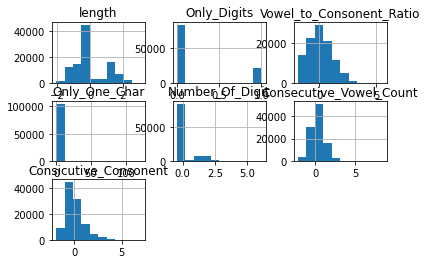

In [263]:
df2.hist()

In [264]:
df2.nunique()

length                       33
Only_Digits                   2
Vowel_to_Consonent_Ratio    180
Only_One_Char                 7
Number_Of_Digit              29
Consecutive_Vowel_Count      10
Consicutive_Consonent        29
dtype: int64

In [265]:
df2.corr()

,length,Only_Digits,Vowel_to_Consonent_Ratio,Only_One_Char,Number_Of_Digit,Consecutive_Vowel_Count,Consicutive_Consonent
length,1.000000,0.704531,-0.289864,-0.330365,0.736253,0.189799,0.382929
Only_Digits,0.704531,1.000000,-0.140699,-0.456113,0.870452,-0.003532,-0.051516
Vowel_to_Consonent_Ratio,-0.289864,-0.140699,1.000000,0.045575,-0.095816,0.660015,-0.693850
Only_One_Char,-0.330365,-0.456113,0.045575,1.000000,-0.397024,-0.017515,0.027979
Number_Of_Digit,0.736253,0.870452,-0.095816,-0.397024,1.000000,0.005328,-0.081457
Consecutive_Vowel_Count,0.189799,-0.003532,0.660015,-0.017515,0.005328,1.000000,-0.262615
Consicutive_Consonent,0.382929,-0.051516,-0.693850,0.027979,-0.081457,-0.262615,1.000000


In [266]:
df2.corr().style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis =1)

,length,Only_Digits,Vowel_to_Consonent_Ratio,Only_One_Char,Number_Of_Digit,Consecutive_Vowel_Count,Consicutive_Consonent
length,1.0,0.705,-0.29,-0.33,0.736,0.19,0.383
Only_Digits,0.705,1.0,-0.141,-0.456,0.87,-0.00353,-0.0515
Vowel_to_Consonent_Ratio,-0.29,-0.141,1.0,0.0456,-0.0958,0.66,-0.694
Only_One_Char,-0.33,-0.456,0.0456,1.0,-0.397,-0.0175,0.028
Number_Of_Digit,0.736,0.87,-0.0958,-0.397,1.0,0.00533,-0.0815
Consecutive_Vowel_Count,0.19,-0.00353,0.66,-0.0175,0.00533,1.0,-0.263
Consicutive_Consonent,0.383,-0.0515,-0.694,0.028,-0.0815,-0.263,1.0


In [267]:
X = df2
y = df.isDGA

In [268]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

## Logistic regression

In [324]:
model1 = LogisticRegression()

In [325]:
model1.fit(X_train,y_train)

LogisticRegression()

In [326]:
model1.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [327]:
model1.score(X_test,y_test)

0.8514680483592401

In [328]:
model1.predict_proba(X_test)

array([[0.32500271, 0.67499729],
       [0.67872854, 0.32127146],
       [0.96127218, 0.03872782],
       ...,
       [0.8404733 , 0.1595267 ],
       [0.99886063, 0.00113937],
       [0.97859264, 0.02140736]])

In [329]:
y_pred = model1.predict(X_test)

In [330]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.8514680483592401


In [331]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      8082
           1       0.67      0.65      0.66      2340

    accuracy                           0.85     10422
   macro avg       0.79      0.78      0.78     10422
weighted avg       0.85      0.85      0.85     10422



In [332]:
c_m = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', c_m)

Confusion matrix
 [[7343  739]
 [ 809 1531]]


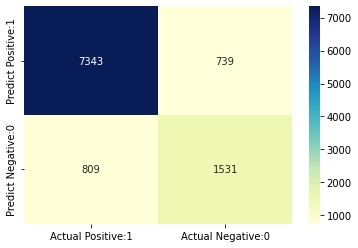

In [333]:
cm = pd.DataFrame(data=c_m, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

## Random Forest

In [334]:
model2 = RandomForestClassifier(n_estimators=100,random_state=1,criterion="entropy")

In [335]:
model2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

In [339]:
y_predict = model2.predict(X_test)

In [340]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [341]:
accuracy_score(y_test, y_predict) *100

89.71406639800422

In [342]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8082
           1       0.79      0.73      0.76      2340

    accuracy                           0.90     10422
   macro avg       0.86      0.84      0.85     10422
weighted avg       0.89      0.90      0.90     10422



In [343]:
con_mat = confusion_matrix(y_test, y_predict)
print('Confusion matrix\n', con_mat)

Confusion matrix
 [[7635  447]
 [ 625 1715]]


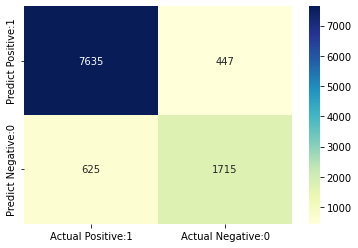

In [344]:
cm = pd.DataFrame(data=con_mat, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

## Gradient Boosting

In [345]:
model3 = GradientBoostingClassifier()

In [346]:
model3.fit(X_train,y_train)

GradientBoostingClassifier()

In [347]:
Y_Pr = model3.predict(X_test)

In [348]:
accuracy_score(y_test,Y_Pr) * 100

89.51256956438304

In [349]:
print(classification_report(y_test,Y_Pr))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      8082
           1       0.80      0.71      0.75      2340

    accuracy                           0.90     10422
   macro avg       0.86      0.83      0.84     10422
weighted avg       0.89      0.90      0.89     10422



In [350]:
C_m = confusion_matrix(y_test, Y_Pr)
print('Confusion matrix\n', C_m)

Confusion matrix
 [[7672  410]
 [ 683 1657]]


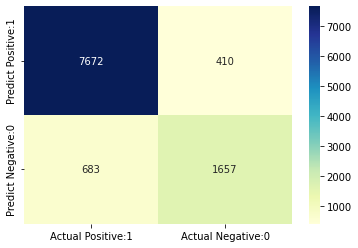

In [351]:
CM = pd.DataFrame(data=C_m, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(CM, annot=True, fmt='d', cmap='YlGnBu')

### XG Boost Classifier

In [352]:
model4 = XGBClassifier()

In [353]:
model4.fit(X_train,y_train)

XGBClassifier()

In [354]:
y_prdiction = model4.predict(X_test)

In [355]:
accuracy_score(y_test,y_prdiction) * 100

89.15755133371714

In [356]:
print(classification_report(y_test,y_prdiction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      8082
           1       0.80      0.69      0.74      2340

    accuracy                           0.89     10422
   macro avg       0.86      0.82      0.84     10422
weighted avg       0.89      0.89      0.89     10422



In [357]:
c_m = confusion_matrix(y_test, y_prdiction)
print('Confusion matrix\n', c_m)

Confusion matrix
 [[7676  406]
 [ 724 1616]]


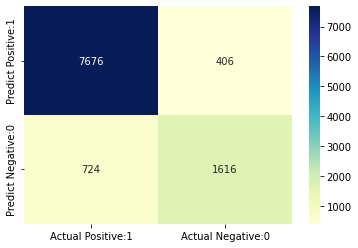

In [358]:
Cm = pd.DataFrame(data=c_m, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(Cm, annot=True, fmt='d', cmap='YlGnBu')

### Catboost

In [312]:
model5 = CatBoostClassifier(task_type='GPU',iterations=1000,random_state = 2021,eval_metric="Logloss")

In [313]:
model5.fit(X_train,y_train,plot=True,eval_set=(X_test,y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.048405
0:	learn: 0.6180588	test: 0.6173491	best: 0.6173491 (0)	total: 48.3ms	remaining: 48.2s
1:	learn: 0.5484440	test: 0.5469079	best: 0.5469079 (1)	total: 101ms	remaining: 50.6s
2:	learn: 0.4943146	test: 0.4925341	best: 0.4925341 (2)	total: 111ms	remaining: 36.9s
3:	learn: 0.4546013	test: 0.4525723	best: 0.4525723 (3)	total: 126ms	remaining: 31.4s
4:	learn: 0.4187297	test: 0.4165824	best: 0.4165824 (4)	total: 141ms	remaining: 28s
5:	learn: 0.3957370	test: 0.3934416	best: 0.3934416 (5)	total: 154ms	remaining: 25.6s
6:	learn: 0.3715923	test: 0.3696444	best: 0.3696444 (6)	total: 169ms	remaining: 24s
7:	learn: 0.3526301	test: 0.3506043	best: 0.3506043 (7)	total: 183ms	remaining: 22.7s
8:	learn: 0.3334622	test: 0.3316880	best: 0.3316880 (8)	total: 214ms	remaining: 23.6s
9:	learn: 0.3220583	test: 0.3203537	best: 0.3203537 (9)	total: 259ms	remaining: 25.6s
10:	learn: 0.3082631	test: 0.3066222	best: 0.3066222 (10)	total: 291ms	remaining: 26.2s
11:	learn: 0.2965626	test

In [314]:
y_pred = model5.predict(X_test)

In [315]:
f1_score(y_test,y_pred)

0.7634910059960026

In [316]:
accuracy_score(y_test,y_pred)

0.8978123200921129

### Hyper parameter optimization

In [306]:
model_params = {
    'xgboost': {
        'model': XGBClassifier(),
        'params' : {
            'n_estimators': [10,50,100],
        }  
    },
    'Gradient_Boost': {
        'model':GradientBoostingClassifier(),
        'params' : {
            'n_estimators': [10,50,100],
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,50,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [10,50,100]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(task_type='GPU',random_state = 2021,eval_metric="Logloss"),
        'params': {
            'iterations': [100,500,1000]
        }
}
}

In [307]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_test,y_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df3 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df3

Streaming output truncated to the last 5000 lines.
105:	learn: 0.2127762	total: 3.12s	remaining: 26.3s
106:	learn: 0.2125438	total: 3.15s	remaining: 26.3s
107:	learn: 0.2124301	total: 3.17s	remaining: 26.2s
108:	learn: 0.2122113	total: 3.2s	remaining: 26.2s
109:	learn: 0.2120469	total: 3.23s	remaining: 26.1s
110:	learn: 0.2118104	total: 3.27s	remaining: 26.1s
111:	learn: 0.2116948	total: 3.29s	remaining: 26.1s
112:	learn: 0.2116518	total: 3.32s	remaining: 26.1s
113:	learn: 0.2114682	total: 3.35s	remaining: 26s
114:	learn: 0.2113798	total: 3.38s	remaining: 26s
115:	learn: 0.2112442	total: 3.41s	remaining: 26s
116:	learn: 0.2111448	total: 3.43s	remaining: 25.9s
117:	learn: 0.2109864	total: 3.46s	remaining: 25.9s
118:	learn: 0.2108864	total: 3.5s	remaining: 25.9s
119:	learn: 0.2107090	total: 3.53s	remaining: 25.9s
120:	learn: 0.2104060	total: 3.56s	remaining: 25.9s
121:	learn: 0.2103684	total: 3.59s	remaining: 25.9s
122:	learn: 0.2102362	total: 3.62s	remaining: 25.8s
123:	learn: 0.2101930

,model,best_score,best_params
0,xgboost,0.888218,{'n_estimators': 100}
1,Gradient_Boost,0.892440,{'n_estimators': 100}
2,random_forest,0.890040,{'n_estimators': 50}
3,logistic_regression,0.855115,{'C': 10}
4,CatBoost,0.893782,{'iterations': 100}


Joblib

In [361]:
joblib.dump(model5,"catboost.joblib")

['catboost.joblib']